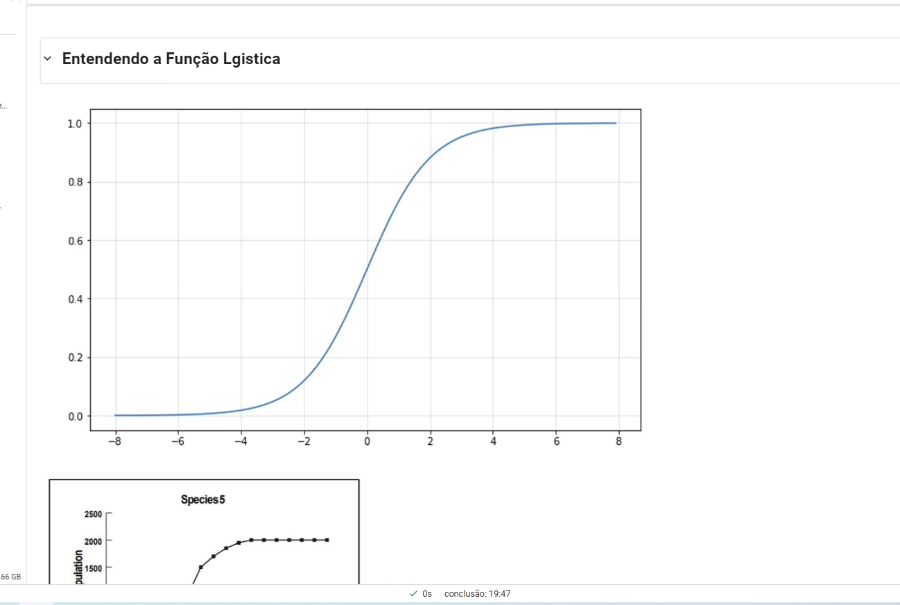

### Regressão Logística ou Redes Neurais => função sigmoide logística.

Valor de entrada entre menos infinito e mais infinito, que terá a capacidade de comprimir isso em uma saída ente 0 e 1. Essa equação é o que permite que um modelo de regressão logística aceite qualquer valor de entrada e produz uma probabilidade entre 0 e 1. Ela tem um papel bem importante para representar algumas séries temporais. Porque a função logística é notável pela sua capacidade de saturação de crescimento. 

Na figura, a curva chega a um momento em que o crescimento se estagna. O declínio dessa curva também tem uma estagnação que não passa de zero. Isso significa que, à medida que a variável de entrada aumenta ou diminui, essa função se satura. Atingindo um limite superior de um ou um limite inferior de zero. 



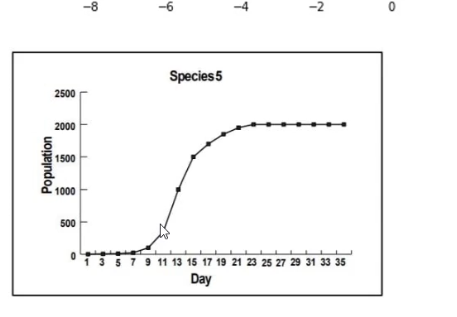





Isso é especialmente útil para a gente lidar com fenômenos que atinge um equilíbrio ou saturação natural ao decorrer do tempo. 

Por exemplo, vamos considerar o crescimento populacional.  Inicialmente a população cresce rapidamente, mas à medida que os recursos se tornam limitados, o crescimento desacelera até atingir um ponto de saturação. 

Em resumo, a função logística é uma ferramenta valiosa para as séries temporais, destacando se pela sua capacidade de modelar o crescimento saturado. 

vamos utilizar a função logística no Prophet, e entender esse crescimento.


### Entender a modelar a série temporal, com o crescimento logístico. 

1) Simular um dado fictíco aqui com esse código. 

In [1]:
import pandas as pd
import numpy as np
import random

# criando dados mensais
x = pd.to_datetime(
    pd.date_range("1995-01", "2004-02", freq="M").strftime("%Y-%m").tolist()
)

x

/tmp/ipykernel_4987/3738685447.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range("1995-01", "2004-02", freq="M").strftime("%Y-%m").tolist()


DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2003-04-01', '2003-05-01', '2003-06-01', '2003-07-01',
               '2003-08-01', '2003-09-01', '2003-10-01', '2003-11-01',
               '2003-12-01', '2004-01-01'],
              dtype='datetime64[ns]', length=109, freq=None)

In [2]:

y = [1 / (1 + np.e ** (-0.03 * (val - 50))) for val in range(len(x))]
# create logistic curve
y

[0.18242552380635635,
 0.18694261396804637,
 0.19154534856146752,
 0.19623405636577915,
 0.20100899975052944,
 0.20587037180094736,
 0.21081829347774714,
 0.21585281082251462,
 0.22097389222018785,
 0.2261814257305462,
 0.23147521650098238,
 0.23685498427314458,
 0.24232036099629517,
 0.2478708885604299,
 0.25350601666233785,
 0.259225100817846,
 0.2650274005334812,
 0.27091207765069353,
 0.2768781948756102,
 0.2829247145070275,
 0.28905049737499605,
 0.295254302001909,
 0.30153478399746125,
 0.30789049569821186,
 0.31431988606174616,
 0.320821300824607,
 0.32739298293223956,
 0.3340330732481797,
 0.3407396115486146,
 0.34751053780725555,
 0.35434369377420455,
 0.36123682485115804,
 0.3681875822638983,
 0.37519352553157076,
 0.382252125230751,
 0.389360766050778,
 0.3965167501352737,
 0.40371730070321216,
 0.41095956594133487,
 0.4182406231581638,
 0.4255574831883411,
 0.4329070950345457,
 0.44028635073280703,
 0.4476920904256748,
 0.45512110762641994,
 0.46257015465625045,
 0.47003594

In [3]:

# add sinusoidal variation
y = [
    y[idx] + y[idx] * 0.01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180))
    for idx in range(len(y))
]
y

[0.18084567242720648,
 0.18600790089820615,
 0.19154534856146752,
 0.19721522664760804,
 0.20274978875226202,
 0.20792907551895684,
 0.21264403345508925,
 0.2169320748766272,
 0.22097389222018785,
 0.22505051860189346,
 0.22947058232261885,
 0.23448643443041314,
 0.2402218051115251,
 0.24663153411762775,
 0.25350601666233785,
 0.26052122632193525,
 0.26732260514909073,
 0.27362119842720045,
 0.2792760303807728,
 0.28433933807956263,
 0.28905049737499605,
 0.29377803049189943,
 0.2989234161667967,
 0.30481159074122977,
 0.31159779599930515,
 0.319217194320484,
 0.32739298293223956,
 0.3357032386144206,
 0.343690503145382,
 0.3509856431853281,
 0.3574124001789973,
 0.36304300897541386,
 0.3681875822638983,
 0.3733175579039129,
 0.3789417247197468,
 0.38546715839027024,
 0.3930828143488418,
 0.4016987141996961,
 0.41095956594133487,
 0.4203318262739546,
 0.4292429191004578,
 0.4372361659848912,
 0.44409934237954857,
 0.4499305508778032,
 0.45512110762641994,
 0.4602573038829692,
 0.465965

In [4]:

# add noise
y = [val + random.uniform(-0.01, 0.01) for val in y]
y = [int(500 * val) for val in y]  # scale up
y

[93,
 96,
 100,
 101,
 97,
 99,
 104,
 110,
 113,
 110,
 110,
 116,
 124,
 119,
 128,
 131,
 136,
 137,
 141,
 140,
 148,
 145,
 153,
 150,
 155,
 158,
 166,
 164,
 173,
 174,
 174,
 184,
 179,
 183,
 194,
 189,
 196,
 199,
 202,
 214,
 211,
 222,
 226,
 226,
 225,
 233,
 234,
 236,
 244,
 243,
 248,
 258,
 255,
 266,
 269,
 274,
 268,
 274,
 280,
 280,
 287,
 289,
 291,
 299,
 300,
 311,
 313,
 312,
 319,
 312,
 322,
 322,
 322,
 327,
 335,
 340,
 348,
 348,
 353,
 358,
 360,
 352,
 359,
 362,
 359,
 366,
 373,
 382,
 379,
 390,
 389,
 387,
 392,
 386,
 394,
 391,
 396,
 395,
 405,
 405,
 408,
 414,
 418,
 419,
 422,
 417,
 420,
 422,
 426]

In [5]:


df = pd.DataFrame({"ds": pd.to_datetime(x), "y": y})
df

,ds,y
0,1995-01-01,93
1,1995-02-01,96
2,1995-03-01,100
3,1995-04-01,101
4,1995-05-01,97
...,...,...
104,2003-09-01,422
105,2003-10-01,417
106,2003-11-01,420
107,2003-12-01,422


## Gerando uma série temporal com os dados aleatórios para nós conseguirmos fazer o exercício de saturação.

## Vizualização dos dados

Série temporal com vários anos, e com um crescimento linear


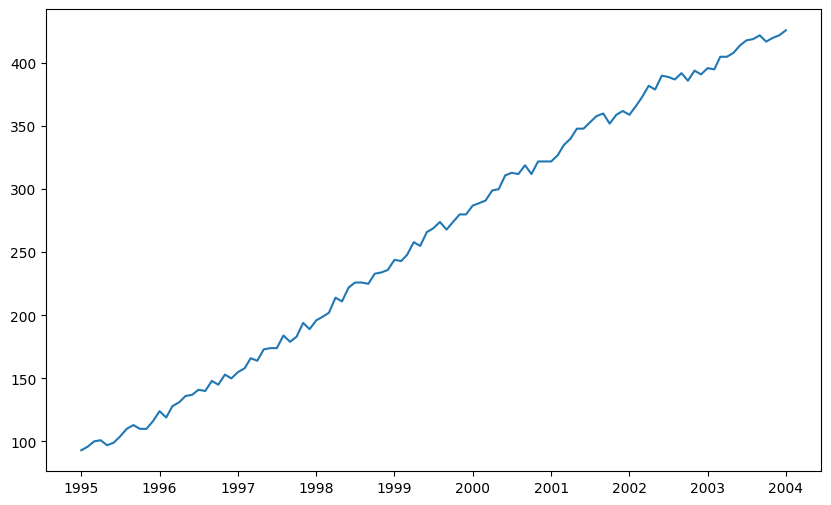

In [6]:
import matplotlib.pyplot as plt

print('Série temporal com vários anos, e com um crescimento linear')
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

## primeiramente faremos uma projeção utilizando um modo de crescimento linear. Definindo alguns parâmetros básicos arbitrários com comandos que nós já conhecemos. 

In [7]:
from prophet import Prophet

model = Prophet(growth='linear',yearly_seasonality=3,seasonality_mode='multiplicative')
model.fit(df)

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:06:58 - cmdstanpy - INFO - Chain [1] start processing
15:06:58 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
model

In [9]:
future = model.make_future_dataframe(periods=12 * 10,freq='M')
forecast = model.predict(future)

forecast

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1995-01-01,91.506504,86.824594,93.894685,91.506504,91.506504,-0.012145,-0.012145,-0.012145,-0.012145,-0.012145,-0.012145,0.0,0.0,0.0,90.395115
1,1995-02-01,93.878357,89.470337,96.366044,93.878357,93.878357,-0.010237,-0.010237,-0.010237,-0.010237,-0.010237,-0.010237,0.0,0.0,0.0,92.917370
2,1995-03-01,96.020676,92.305285,99.188322,96.020676,96.020676,-0.002114,-0.002114,-0.002114,-0.002114,-0.002114,-0.002114,0.0,0.0,0.0,95.817663
3,1995-04-01,98.392529,95.405439,102.405825,98.392529,98.392529,0.004954,0.004954,0.004954,0.004954,0.004954,0.004954,0.0,0.0,0.0,98.879956
4,1995-05-01,100.687871,97.794054,104.941017,100.687871,100.687871,0.006628,0.006628,0.006628,0.006628,0.006628,0.006628,0.0,0.0,0.0,101.355208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2013-08-31,720.635115,654.825944,787.521359,655.116805,786.846695,0.000320,0.000320,0.000320,0.000320,0.000320,0.000320,0.0,0.0,0.0,720.865536
225,2013-09-30,723.115777,651.645105,783.115784,656.816719,790.080993,-0.007207,-0.007207,-0.007207,-0.007207,-0.007207,-0.007207,0.0,0.0,0.0,717.903987
226,2013-10-31,725.679127,653.411519,787.640518,658.613566,793.446047,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,-0.007393,0.0,0.0,0.0,720.314283
227,2013-11-30,728.159788,654.778225,791.527397,660.312021,796.901346,-0.008191,-0.008191,-0.008191,-0.008191,-0.008191,-0.008191,0.0,0.0,0.0,722.195489


Temos uma previsão coerente.

https://facebook.github.io/prophet/docs/trend_changepoints.html


https://github.com/facebook/prophet/issues/1977

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


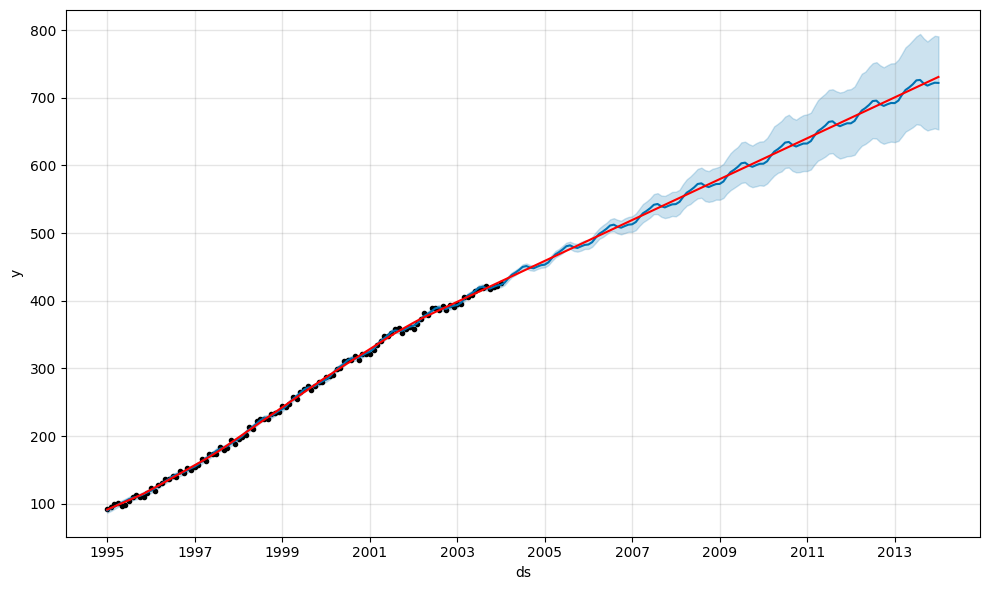

In [10]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast,cp_linestyle='')
plt.show()

Temos uma série temporal com crescimento constante, o Prophet projetou um crescimento constante futuro. 






Vamos supor que esse crescimento de projeção não represente algo realista. Imagine que essa série temporal represente o número de clientes que adotaram um determinado recurso da empresa. São adotados de forma linear. Vamos imaginar que o número de clientes dessa empresa estagnou em 500. 

Não vai fazer sentido para essa previsão continuar crescendo além do número de clientes. 

Nese cenário imaginativo, nosso limite serie o número de clientes. 

## Nosso número de clientes sempre será a nossa saturação com relação a essa ao número de clientes que adotarão um determinado recurso. 

Aplicaremos o nosso crescimento logístico. 


### Como definimos o Growth mode como logística, o prophet automaticamente vai exigir que um teto para aquela série temporal seja definido. Ou falando em termos do Prophet, que uma capacidade ou CAP seja definida para saber até onde aquela série pode ir. 

Para isso, nós precisamos criar uma nova coluna no nosso DataFrame, na coluna CAP, e um valor no qual seja o limite, a saturação para aquela nossa série temporal. 

Isso pode ser um valor fixo ou um valor que vai se alterando com o tempo. O ponto é que a série nunca vai utlrapassar esse valor, que no caso é 500. 

Lembrando que também se deve criar uma coluna cap na previsão futura

In [11]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
df['cap'] = 500



In [12]:

model.fit(df)
future = model.make_future_dataframe(periods=12 * 10,
                                     freq='M')
future['cap'] = 500

15:06:58 - cmdstanpy - INFO - Chain [1] start processing
15:06:58 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [13]:
future

,ds,cap
0,1995-01-01,500
1,1995-02-01,500
2,1995-03-01,500
3,1995-04-01,500
4,1995-05-01,500
...,...,...
224,2013-08-31,500
225,2013-09-30,500
226,2013-10-31,500
227,2013-11-30,500


# Visualizar a projeção

Nossa projeção está obdecendo o Capacity

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


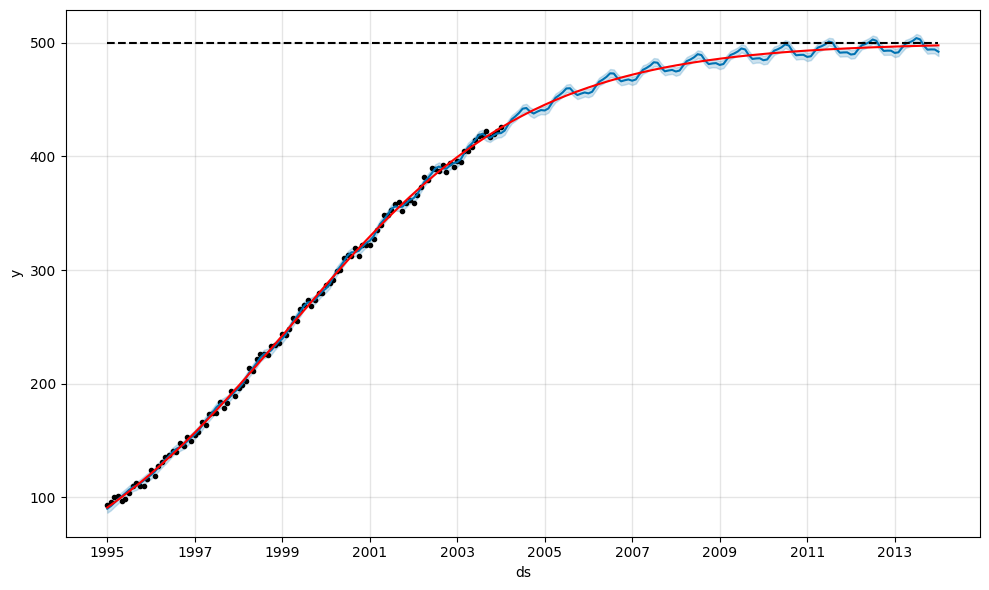

In [14]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()



O  Capacity pode ser dinâmico. O importante é que você tenha um entendimento e domínio sobre aquele dado da série temporal e como ele deve se comportar. Pois esse ajuste de capacete, geralmente, é um ajuste manual ou um ajuste a partir de um entendimento de que aquela previsão está correlacionada com algum outro fator. E <b>é assim que nós projetamos uma série temporal que exige uma saturação no seu crescimento.</b>


https://facebook.github.io/prophet/docs/saturating_forecasts.html

# growth = Flat

# Modo de Crescimento Flat

#### growth = Flat é quando a linha de tendência é plana, sem nenhuma direção. 

growth = Flat é quando a linha de tendência é plana, sem nenhuma direção. 

Os úmicos valores que variam com o tempo são a sazonalidade, os feriados, os regressores e os ruídos dos dados. 

Para modelar esse exemplo, vamos utilizar essa base fictícia novamente.

/tmp/ipykernel_4987/3356866912.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range("1995-01", "2096-02", freq="M").strftime("%Y-%m").tolist()


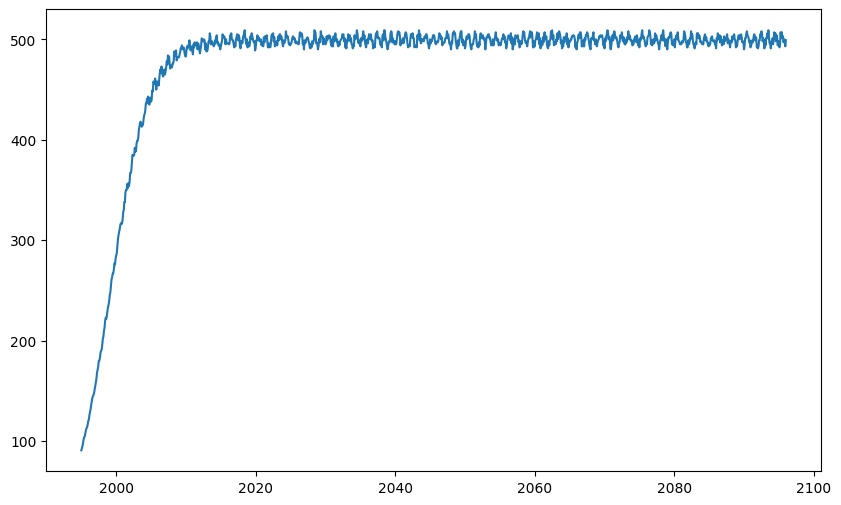

In [15]:
x = pd.to_datetime(
    pd.date_range("1995-01", "2096-02", freq="M").strftime("%Y-%m").tolist()
)

# create logistic curve
y = [1 / (1 + np.e ** (-0.03 * (val - 50))) for val in range(len(x))]

# add sinusoidal variation
y = [
    y[idx] + y[idx] * 0.01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180))
    for idx in range(len(y))
]

# add noise
y = [val + 1 * val * random.uniform(-0.01, 0.01) for val in y]
y = [int(500 * val) for val in y]  # scale up
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()



Há um crescimento e depois uma saturação por muito tempo. 

Vamos fazer agora um recorte e pegar apenas o período em que há saturação.

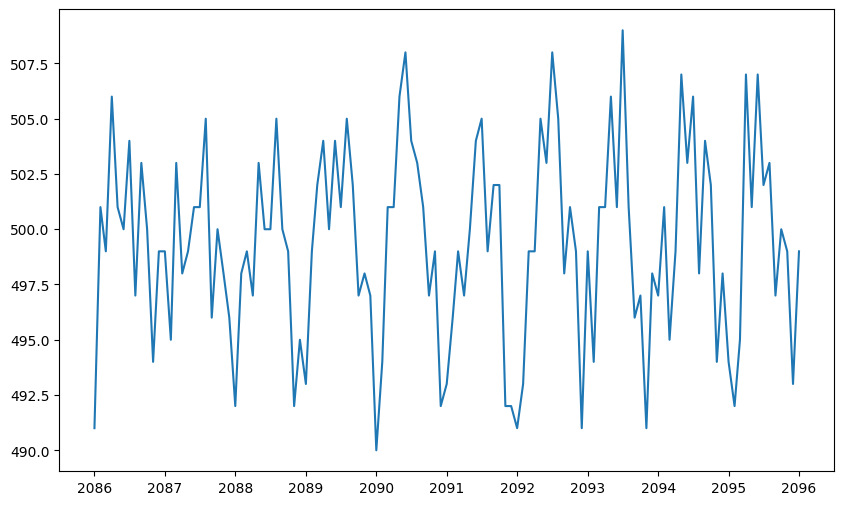

In [16]:

df = pd.DataFrame({"ds": pd.to_datetime(x), "y": y})
df = df[df["ds"].dt.year > 2085]
plt.figure(figsize=(10, 6))
plt.plot(df["ds"], df["y"])
plt.show()

## Faremos uma previsão inicialmente como Growth no modo linear.

17:08:47 - cmdstanpy - INFO - Chain [1] start processing
17:08:47 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

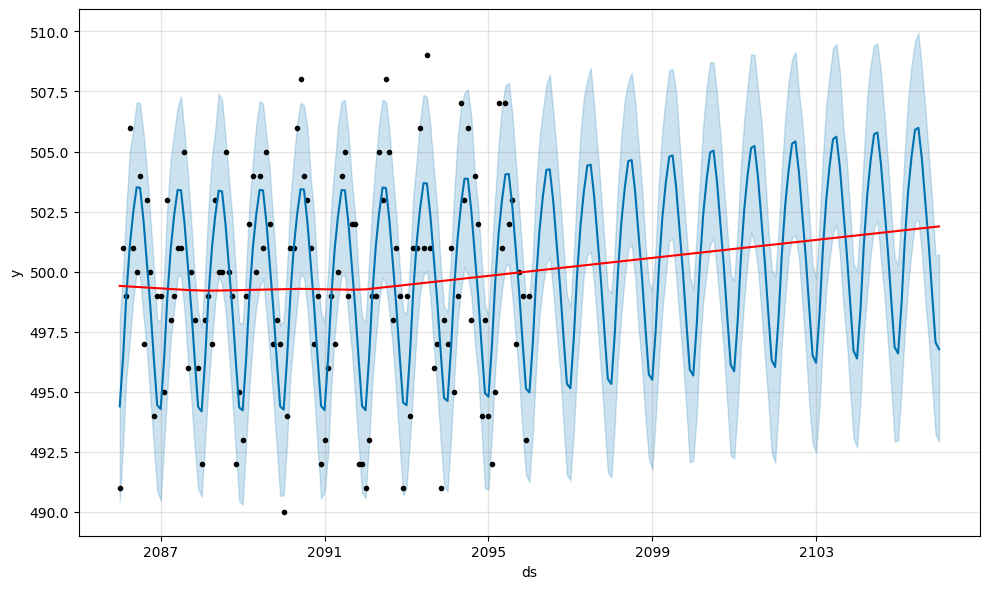

In [17]:
model = Prophet(
    growth="linear", yearly_seasonality=3, seasonality_mode="multiplicative"
)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq="M")
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle="")
plt.show()



## O Prophet projetou uma tendência de queda. Mas, agora vemos que não faz sentido isso. Vamos aplicar assim, o modo de crescimento flat. 

17:10:17 - cmdstanpy - INFO - Chain [1] start processing
17:10:17 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

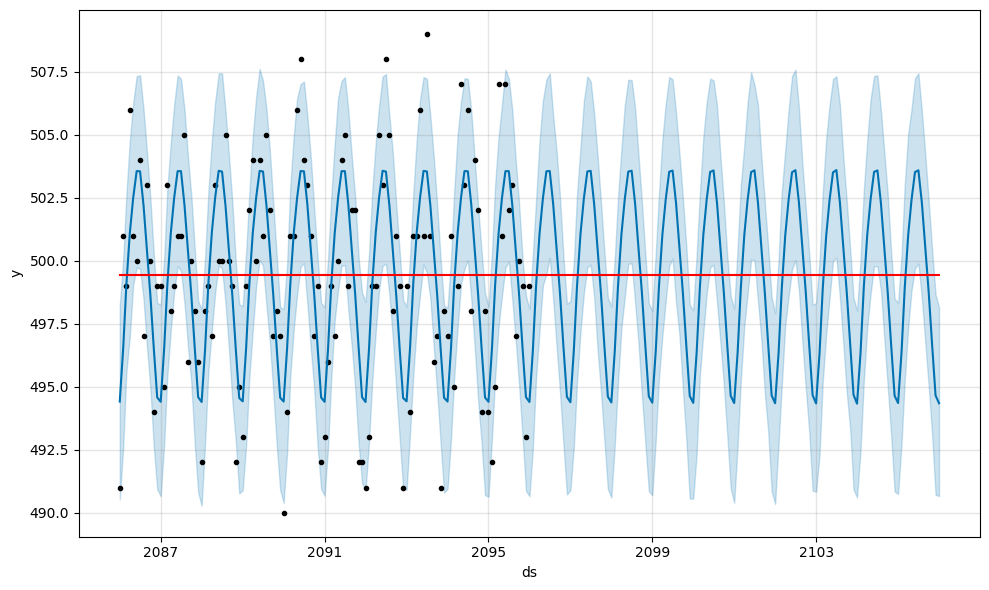

In [18]:
model = Prophet(
    growth="flat", yearly_seasonality=3, seasonality_mode="multiplicative"
)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq="M")
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle="")
plt.show()


Altendo o growth para o Flat, verificamos que o prophet não aplica nenhuma tendência ao dado. E esse é o comportamento do modo de crescimento flat. 